In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dis(x1, y1, x2, y2):
    summa = (x1 - x2)**2 + (y1 - y2)**2
    return np.sqrt(summa)

def knn(X, Y, x, y, k):
    distances = []
    for i in range(len(X)):
        dist = dis(X[i], Y[i], x, y)
        distances.append((dist, [X[i], Y[i]]))

    distances.sort(key=lambda z: z[0])
    knn_result = [neighbor[1] for neighbor in distances[:k]]
    return knn_result

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Ближайшие соседи: [[1.4839098983138888, 1.7932572832923555], [2.907226370735904, 2.0310241298371015], [2.2309182970362063, 2.9728144014886517], [0.9624851837073027, 3.0095983339241776]]
Класс 1 - 50.00%
Класс 2 - 25.00%
Класс 3 - 25.00%

Матрица с координатами и классами:
[[-2.63695241  3.05308781  3.        ]
 [-0.24217084 -0.90775154  2.        ]
 [ 0.96248518  3.00959833  1.        ]
 [-3.04471128 -2.30836765  3.        ]
 [ 4.37859384 -4.89244492  2.        ]
 [ 0.56507972  4.25909026  0.        ]
 [-3.20272222 -1.08763599  0.        ]
 [-4.58028601 -1.44588168  0.        ]
 [ 2.90722637  2.03102413  1.        ]
 [ 0.41914638 -2.6419538   1.        ]
 [-4.6414792   4.04767481  1.        ]
 [-1.71181129  4.01985729  0.        ]
 [ 4.29547355 -1.74438347  3.        ]
 [-0.28027667 -2.87364547  2.        ]
 [ 4.48612844  4.48662294  2.        ]
 [ 2.02588186 -4.6580946   0.        ]
 [ 2.91432298 -0.62043726  1.        ]
 [-4.48484255 -1.43301215  2.        ]
 [-4.1419389  -2.69621116

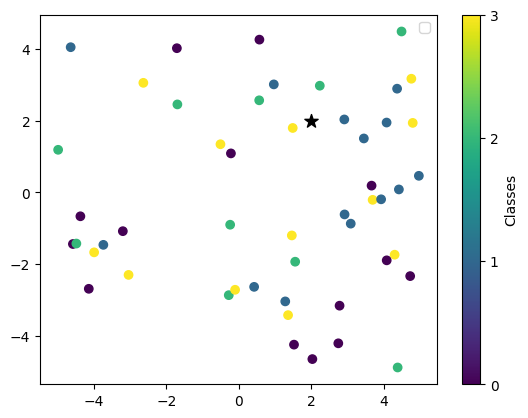

In [30]:
X = np.random.uniform(-5.0, 5.0, 50) 
Y = np.random.uniform(-5.0, 5.0, 50) 
classes = np.random.randint(4, size=50)

x = float(input("Введите x: "))
y = float(input("Введите y: "))
k = int(input("Введите количество ближайших соседей: "))

knn_result = knn(X, Y, x, y, k)
print("Ближайшие соседи:", knn_result)

neighbor_classes = [classes[X.tolist().index(x_)] for x_, y_ in knn_result for x_ in [x_]]
uniq, counts = np.unique(neighbor_classes, return_counts=True)

next = 0
for i, count in zip(uniq, counts):
    percent = (count / len(knn_result)) * 100
    print(f"Класс {i} - {percent:.2f}%")
    if next < percent:
        next = i
        
data = np.column_stack((X, Y, classes))
print("\nМатрица с координатами и классами:")
print(data)

cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(np.unique(classes))) for i in range(len(np.unique(classes)))]

plt.scatter(x, y, color='k', marker='*', s=100)
plt.scatter(X, Y, c=classes, cmap=cmap)
plt.legend()
plt.colorbar(ticks=np.unique(classes), label='Classes')
plt.show()